In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [3]:
data_set = pd.read_csv('dataMobilki.csv')
data_set = data_set.sort_values(by = 'price_range')

In [4]:
# redukcja z 2000 rekordów do 400, zachowaując proporcje wystąpień telefonów danej ceny
dataset = data_set[400:500]
dataset = dataset.append(data_set[900:1000])
dataset = dataset.append(data_set[1400:1500])
dataset = dataset.append(data_set[1900:2000])

In [5]:
dataset.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1170           1100     1          1.6         0  12       0          15   
86             1496     1          2.0         1   4       0          42   
1081            530     1          2.6         0   1       0          40   
1972           1191     0          0.8         0   6       1          46   
1566           1317     0          1.5         0   6       0          12   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1170    0.1        112        8  ...        919      1344   757    12     2   
86      0.5        182        5  ...         96       741   854    16     0   
1081    0.9        118        6  ...        818      1090  1229    16    11   
1972    0.8         89        6  ...         42       807   824    19    18   
1566    0.1        154        2  ...        431       542   425     7     0   

      talk_time  three_g  touch_screen  wifi  price_range  
1170         16        1             1     1            0  
86            7        0             1     1            0  
1081          2        0             1     0            0  
1972          7        1             0     0            0  
1566         11        1             1     1            0  

[5 rows x 21 columns]

## Analiza Danych

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1170 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  400 non-null    int64  
 1   blue           400 non-null    int64  
 2   clock_speed    400 non-null    float64
 3   dual_sim       400 non-null    int64  
 4   fc             400 non-null    int64  
 5   four_g         400 non-null    int64  
 6   int_memory     400 non-null    int64  
 7   m_dep          400 non-null    float64
 8   mobile_wt      400 non-null    int64  
 9   n_cores        400 non-null    int64  
 10  pc             400 non-null    int64  
 11  px_height      400 non-null    int64  
 12  px_width       400 non-null    int64  
 13  ram            400 non-null    int64  
 14  sc_h           400 non-null    int64  
 15  sc_w           400 non-null    int64  
 16  talk_time      400 non-null    int64  
 17  three_g        400 non-null    int64  
 18  touch_

In [7]:
dataset.describe()

battery_power        blue  clock_speed    dual_sim          fc  \
count     400.000000  400.000000   400.000000  400.000000  400.000000   
mean     1252.467500    0.485000     1.487750    0.515000    4.140000   
std       438.587164    0.500401     0.803049    0.500401    4.222555   
min       501.000000    0.000000     0.500000    0.000000    0.000000   
25%       852.000000    0.000000     0.600000    0.000000    0.000000   
50%      1269.000000    0.000000     1.500000    1.000000    3.000000   
75%      1624.250000    1.000000     2.200000    1.000000    7.000000   
max      1996.000000    1.000000     3.000000    1.000000   19.000000   

          four_g  int_memory       m_dep   mobile_wt     n_cores  ...  \
count  400.00000  400.000000  400.000000  400.000000  400.000000  ...   
mean     0.50250   32.395000    0.499500  137.872500    4.727500  ...   
std      0.50062   18.654059    0.287064   34.787594    2.323088  ...   
min      0.00000    2.000000    0.100000   80.000000    1.000000  ...   
25%      0.00000   15.750000    0.200000  106.000000    3.000000  ...   
50%      1.00000   33.000000    0.500000  136.000000    5.000000  ...   
75%      1.00000   49.000000    0.700000  167.000000    7.000000  ...   
max      1.00000   64.000000    1.000000  200.000000    8.000000  ...   

         px_height     px_width          ram       sc_h        sc_w  \
count   400.000000   400.000000   400.000000  400.00000  400.000000   
mean    631.687500  1237.842500  2116.372500   12.13250    5.675000   
std     448.251317   427.568005  1094.482299    4.29897    4.267306   
min       4.000000   507.000000   267.000000    5.00000    0.000000   
25%     270.750000   882.000000  1202.000000    8.00000    2.000000   
50%     537.000000  1219.500000  2169.000000   12.00000    5.000000   
75%     920.000000  1608.250000  3009.250000   16.00000    8.000000   
max    1960.000000  1994.000000  3998.000000   19.00000   18.000000   

        talk_time     three_g  touch_screen       wifi  price_range  
count  400.000000  400.000000    400.000000  400.00000   400.000000  
mean    10.840000    0.740000      0.522500    0.49750     1.500000  
std      5.322615    0.439184      0.500119    0.50062     1.119434  
min      2.000000    0.000000      0.000000    0.00000     0.000000  
25%      6.750000    0.000000      0.000000    0.00000     0.750000  
50%     11.000000    1.000000      1.000000    0.00000     1.500000  
75%     15.000000    1.000000      1.000000    1.00000     2.250000  
max     20.000000    1.000000      1.000000    1.00000     3.000000  

[8 rows x 21 columns]

## Wizualizacja

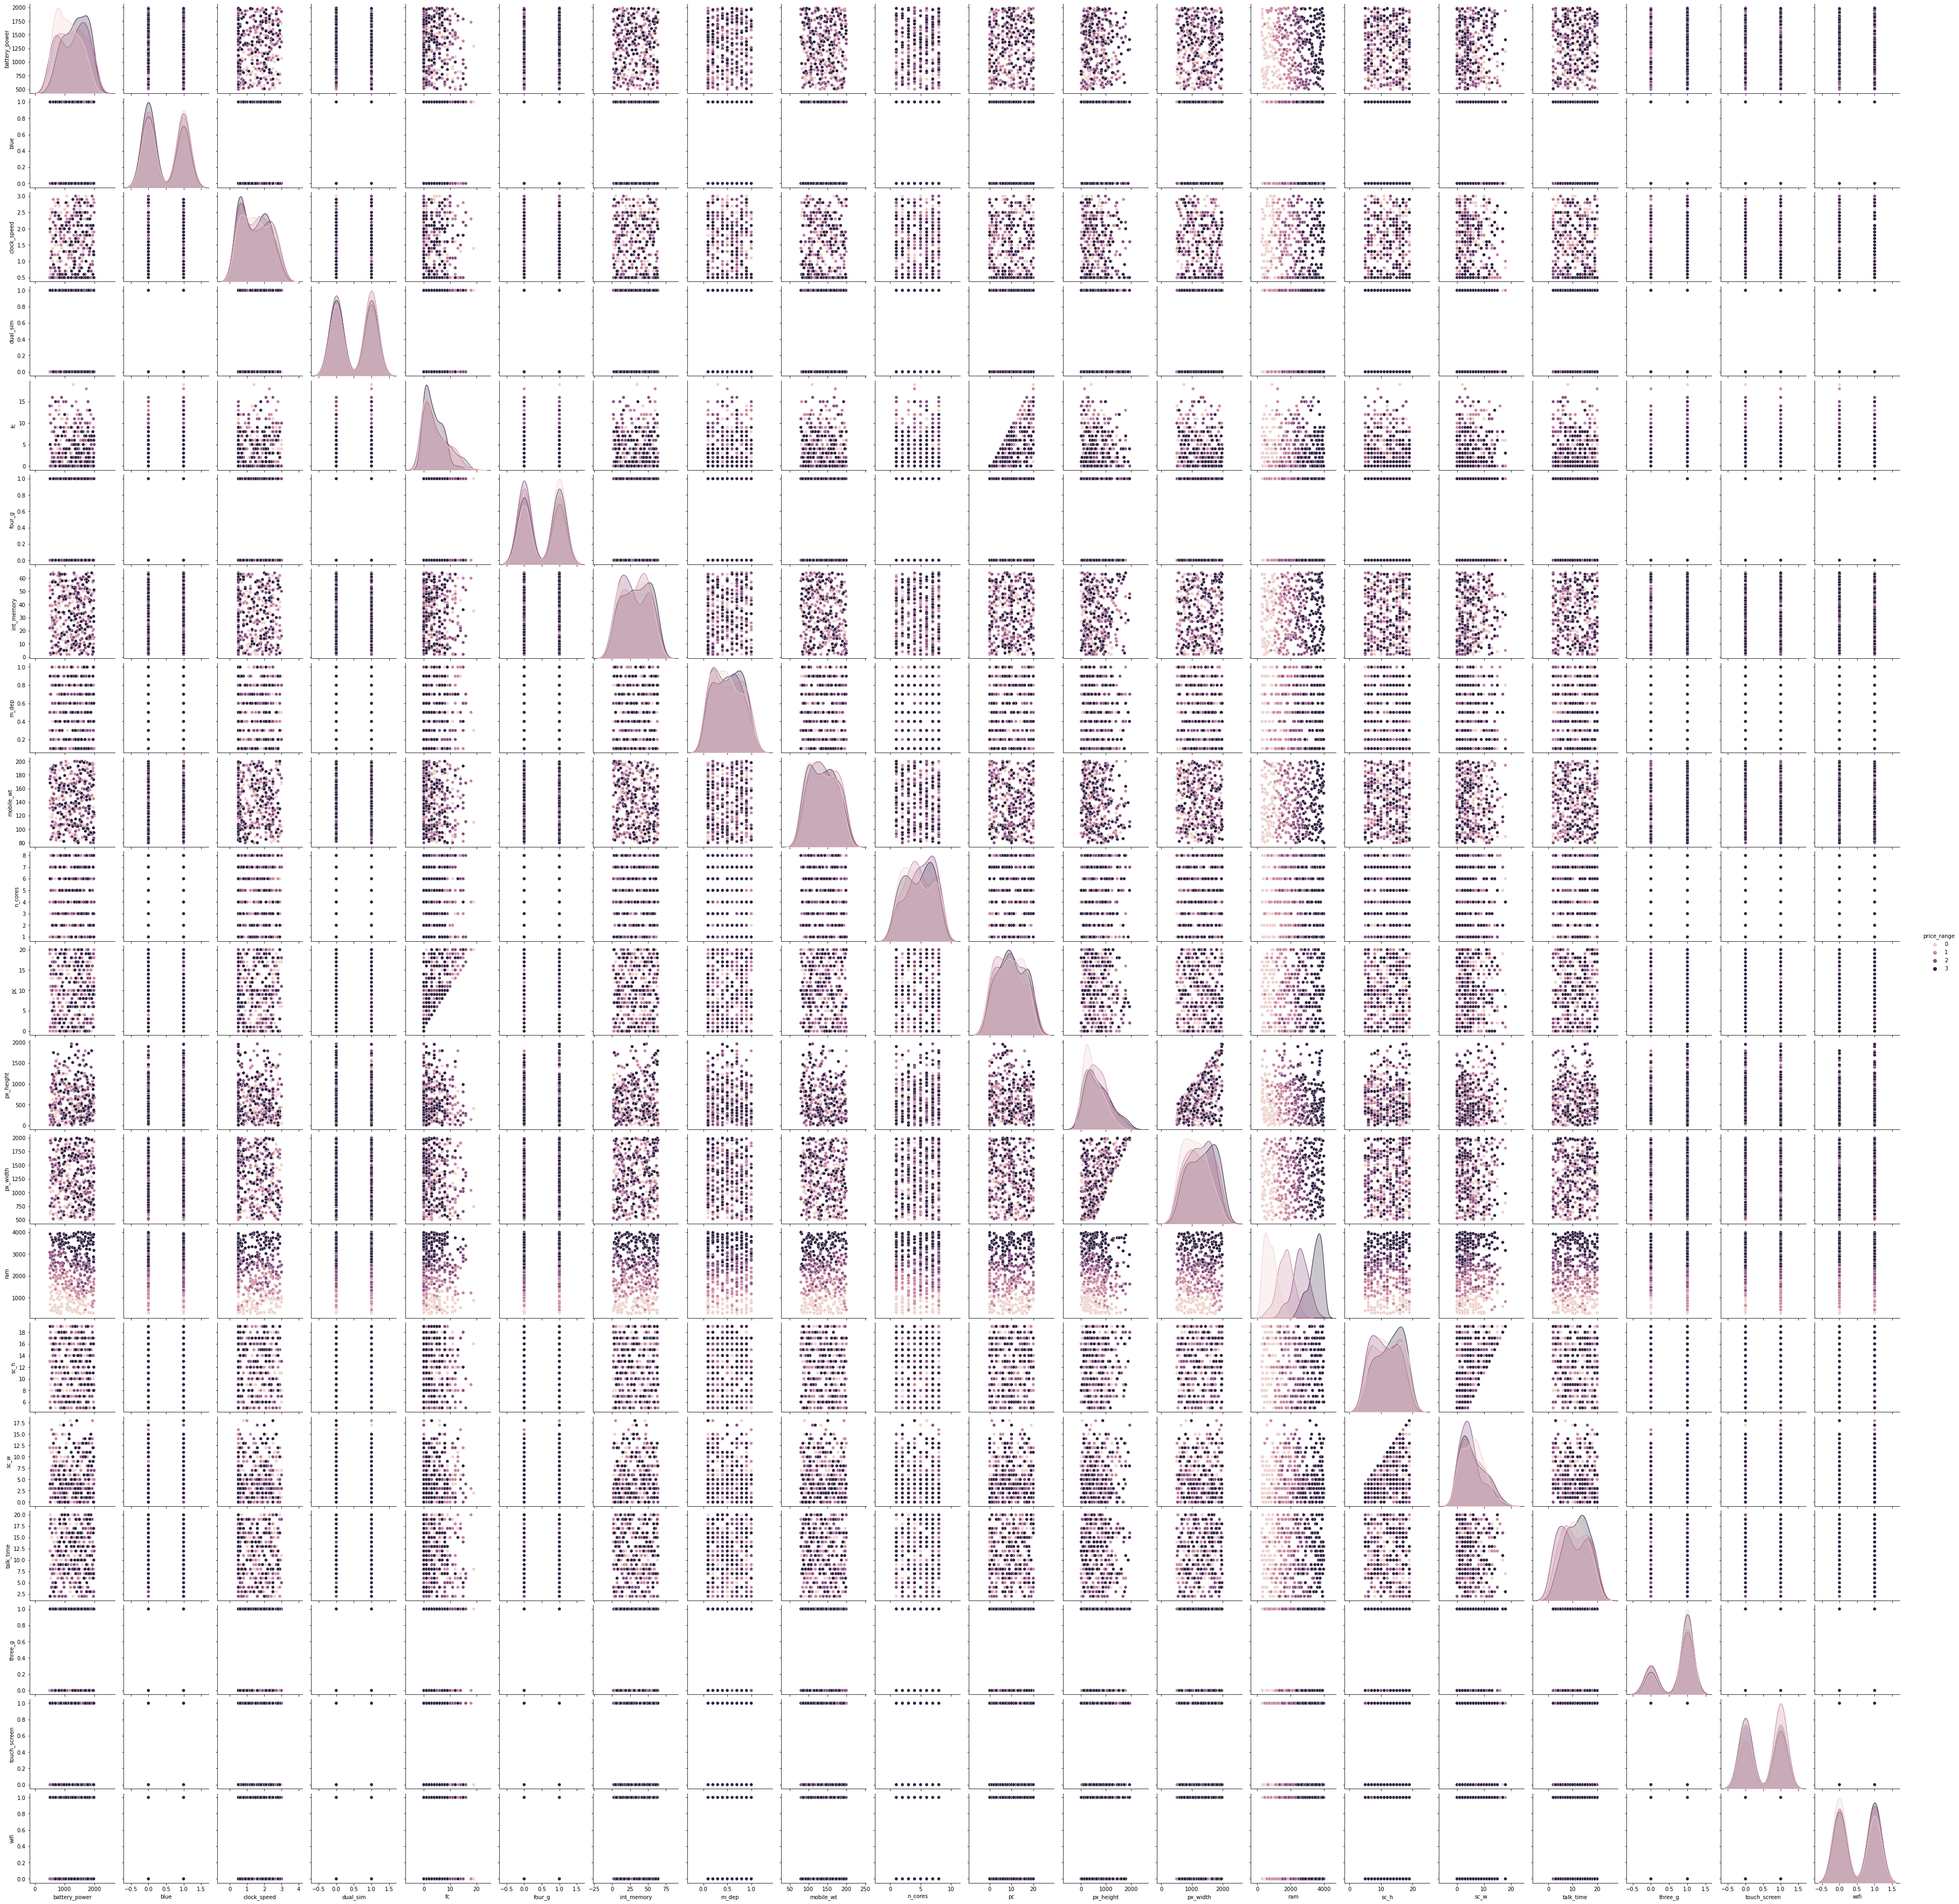

In [8]:
sns.pairplot(dataset,
             hue='price_range',
             kind = 'scatter'
            )

### Zależność ceny od RAMu

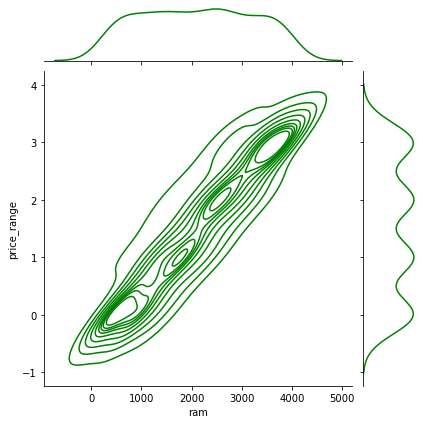

In [9]:
sns.jointplot(x = 'ram',
              y = 'price_range',
              data = dataset,
              color = 'green',
              kind='kde');

### Cena a ilość pamięci

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

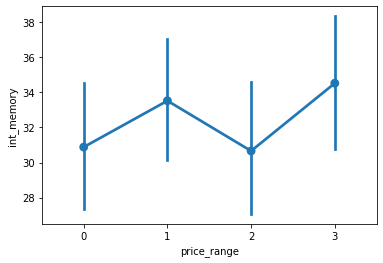

In [63]:
sns.pointplot(
              y="int_memory",
              x="price_range", 
              data=dataset
             )

### % urządzeń z ekranem dotykowym

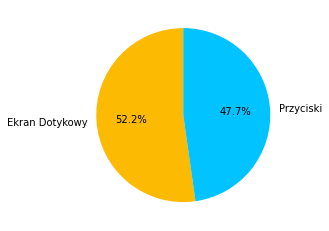

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(
        dataset['touch_screen'].value_counts().values, 
        labels = ["Ekran Dotykowy","Przyciski"],
        colors = ['#fcba03', '#00c3ff'],
        autopct = '%1.1f%%',
        startangle = 90)
plt.show()

### % urządzeń z Bluetooth

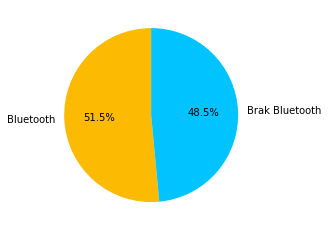

In [12]:
fig1, ax1 = plt.subplots()
ax1.pie(
        dataset['blue'].value_counts().values,
        labels = ["Bluetooth","Brak Bluetooth"],
        colors = ['#fcba03', '#00c3ff'],
        autopct = '%1.1f%%',
        startangle = 90)
plt.show()

### % urządzeń z WiFi


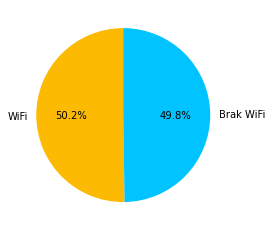

In [13]:
fig1, ax1 = plt.subplots()
ax1.pie(
        dataset['wifi'].value_counts().values, 
        labels = ["WiFi","Brak WiFi"],
        colors = ['#fcba03', '#00c3ff'],
        autopct = '%1.1f%%',
        startangle = 90)
plt.show()

### Cena a pojemość bateri

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

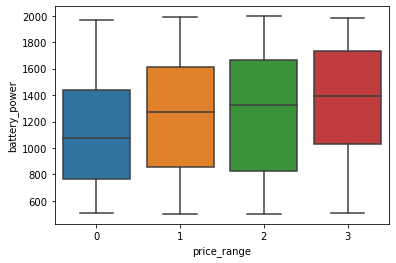

In [14]:
sns.boxplot(
            x="price_range",
            y="battery_power", 
            data=dataset
            )

### Cena a waga 

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

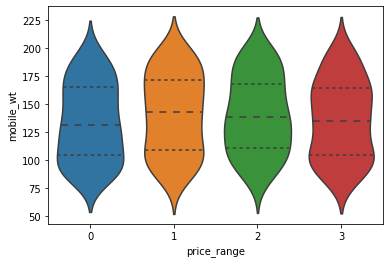

In [51]:
sns.violinplot(x='price_range',
               y='mobile_wt', 
               data=dataset, 
               inner='quartile')

### Cena a ilość rdzeni

<AxesSubplot:xlabel='price_range', ylabel='n_cores'>

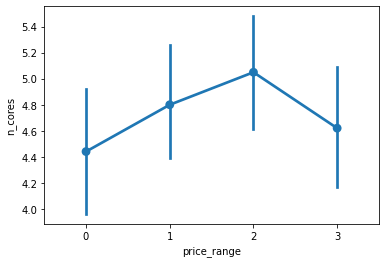

In [68]:
sns.pointplot(
              y="n_cores",
              x="price_range",
              data=dataset
              )

## X & Y array

In [17]:
# X to zbiór bez 'price_range'
X = dataset.drop('price_range',
               axis = 1
              )

In [18]:
X

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1170           1100     1          1.6         0  12       0          15   
86             1496     1          2.0         1   4       0          42   
1081            530     1          2.6         0   1       0          40   
1972           1191     0          0.8         0   6       1          46   
1566           1317     0          1.5         0   6       0          12   
...             ...   ...          ...       ...  ..     ...         ...   
981            1046     1          2.8         1   0       1          58   
982            1035     0          0.6         1   2       1          44   
987            1688     0          2.5         0   0       1          21   
956             862     0          2.3         0   9       1           6   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1170    0.1        112        8  14        919      1344   757    12     2   
86      0.5        182        5   5         96       741   854    16     0   
1081    0.9        118        6   2        818      1090  1229    16    11   
1972    0.8         89        6   9         42       807   824    19    18   
1566    0.1        154        2   9        431       542   425     7     0   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
981     0.2        100        8   0        259      1040  3863    17    12   
982     0.5         99        3   3        236      1960  3506    14     5   
987     0.2        170        7   0        650       864  3984    17    14   
956     0.1        107        8  14        829      1977  3458     9     4   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  
1170         16        1             1     1  
86            7        0             1     1  
1081          2        0             1     0  
1972          7        1             0     0  
1566         11        1             1     1  
...         ...      ...           ...   ...  
981           9        1             1     1  
982          12        1             1     0  
987           8        1             1     1  
956           9        1             1     1  
1999          2        1             1     1  

[400 rows x 20 columns]

In [19]:
# zbiór y zawiera same 'price_range'
y = dataset['price_range']

In [20]:
y

1170    0
86      0
1081    0
1972    0
1566    0
       ..
981     3
982     3
987     3
956     3
1999    3
Name: price_range, Length: 400, dtype: int64

## Przecinanie danych na zbiory: Treningowy i Testowy

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# przecina X i y na zbiory treningowe i testowe,
# zbiory przed cięciem są tasowane
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Ile wynosi optymalna wartość K dla KNN?

In [54]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test) * 100)
    #print(pred_i != y_test)

Najlepsze K:  6


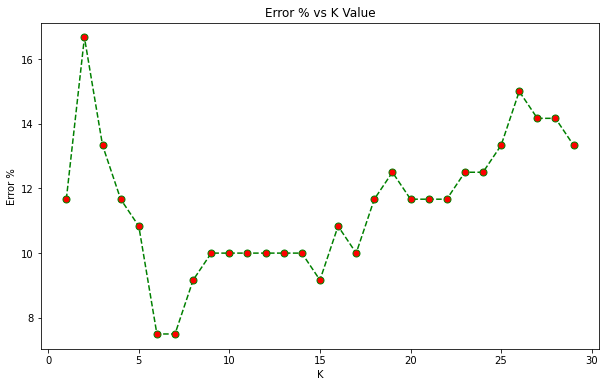

In [55]:
plt.figure(figsize=(10,6))
plt.plot(
         range(1,30),
         error_rate,
         color='green',
         linestyle='dashed',
         marker='o',
         markerfacecolor='red',
         markersize = 7
        )
plt.title('Error % vs K Value')
plt.xlabel('K')
plt.ylabel('Error %')
print("Najlepsze K: ", np.argmin(error_rate) + 1)
k = np.argmin(error_rate) + 1

## Tworzenie i trenowanie KNN

In [56]:
knn = KNeighborsClassifier(n_neighbors = k, metric='minkowski', p = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [57]:
knn.score(X_test,y_test)

0.925

In [58]:
X_train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1020           1119     0          0.5         1   0       1          23   
766            1872     1          0.9         1   0       0          16   
1604           1179     1          0.8         0   1       0           5   
472            1077     0          2.5         1   0       1          45   
428            1197     0          1.3         0   3       1          20   
...             ...   ...          ...       ...  ..     ...         ...   
698            1940     1          0.9         1   4       0          17   
441            1654     0          1.8         0   1       0          11   
821            1883     1          2.7         1   6       1          30   
1107           1396     0          2.4         1   0       0          46   
1056            812     0          0.5         1   1       0          64   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1020    0.4        164        4   1        821       915  3520     7     4   
766     0.5         80        2   2        286      1484  2295    15    11   
1604    0.9        154        5  17        913      1429   543     8     7   
472     1.0        174        3   4        897      1304  1965     6     2   
428     0.5        149        6   7        649      1629  1797    19     5   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
698     0.7         93        5   7        112       858  2297    14     6   
441     0.3        146        7   2       1184      1719  1070     8     1   
821     0.5         95        2  10        531       791  3724    16    15   
1107    0.1        138        7   1       1191      1347  2389     7     3   
1056    1.0        106        4   7         35      1309  3102     6     0   

      talk_time  three_g  touch_screen  wifi  
1020          7        1             0     0  
766          16        0             0     1  
1604         18        0             0     1  
472           6        1             1     0  
428           4        1             1     1  
...         ...      ...           ...   ...  
698           8        0             1     0  
441          14        1             1     1  
821          20        1             1     1  
1107         15        0             0     1  
1056          2        0             0     0  

[280 rows x 20 columns]

In [28]:
X_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1913           1969     0          1.2         1   9       0          63   
278             538     0          0.8         0  12       1           2   
1496           1868     1          0.5         0   2       1          40   
1108            808     0          2.3         0   3       0          45   
1166            999     1          1.8         1   0       1          27   
...             ...   ...          ...       ...  ..     ...         ...   
1005           1270     1          2.3         0   0       0          58   
1323            712     0          0.5         0   6       0          27   
1013           1694     0          1.8         0   0       0          53   
1774            579     1          2.5         0   3       0           7   
794             967     1          1.6         0   4       0          25   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1913    0.2        132        4  11        390       756   298    10     1   
278     0.8        177        7  13        235       662   417     8     4   
1496    0.9        179        8  17        576       884   298     8     2   
1108    0.8        161        1   9        526      1324  3431    15     6   
1166    0.1        167        4   1         20       745  1344    17    10   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1005    0.5        104        5   1       1512      1716  3299    13     4   
1323    0.5         86        2  11       1245      1309  2001    11    10   
1013    1.0        186        6   0       1194      1208  1653     7     5   
1774    1.0         89        8  10        808      1517  2908    12     4   
794     0.6         92        8   9        243      1642  3076     7     4   

      talk_time  three_g  touch_screen  wifi  
1913         10        1             1     0  
278           9        1             0     1  
1496         17        1             1     0  
1108         13        0             1     1  
1166          5        1             0     0  
...         ...      ...           ...   ...  
1005         16        0             0     1  
1323         12        1             1     1  
1013          6        1             0     0  
1774         11        0             0     1  
794          18        0             1     1  

[120 rows x 20 columns]

In [29]:
y_train

900     3
805     2
784     2
1109    3
798     3
       ..
633     1
1718    2
1604    0
1004    2
1331    1
Name: price_range, Length: 280, dtype: int64

In [30]:
y_test

1913    0
278     0
1496    0
1108    3
1166    0
       ..
1005    3
1323    1
1013    2
1774    2
794     2
Name: price_range, Length: 120, dtype: int64

## Tworzenie i trenowanie Drzewa Decyzyjnego

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier()

In [87]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
dtree.score(X_test,y_test)

0.8

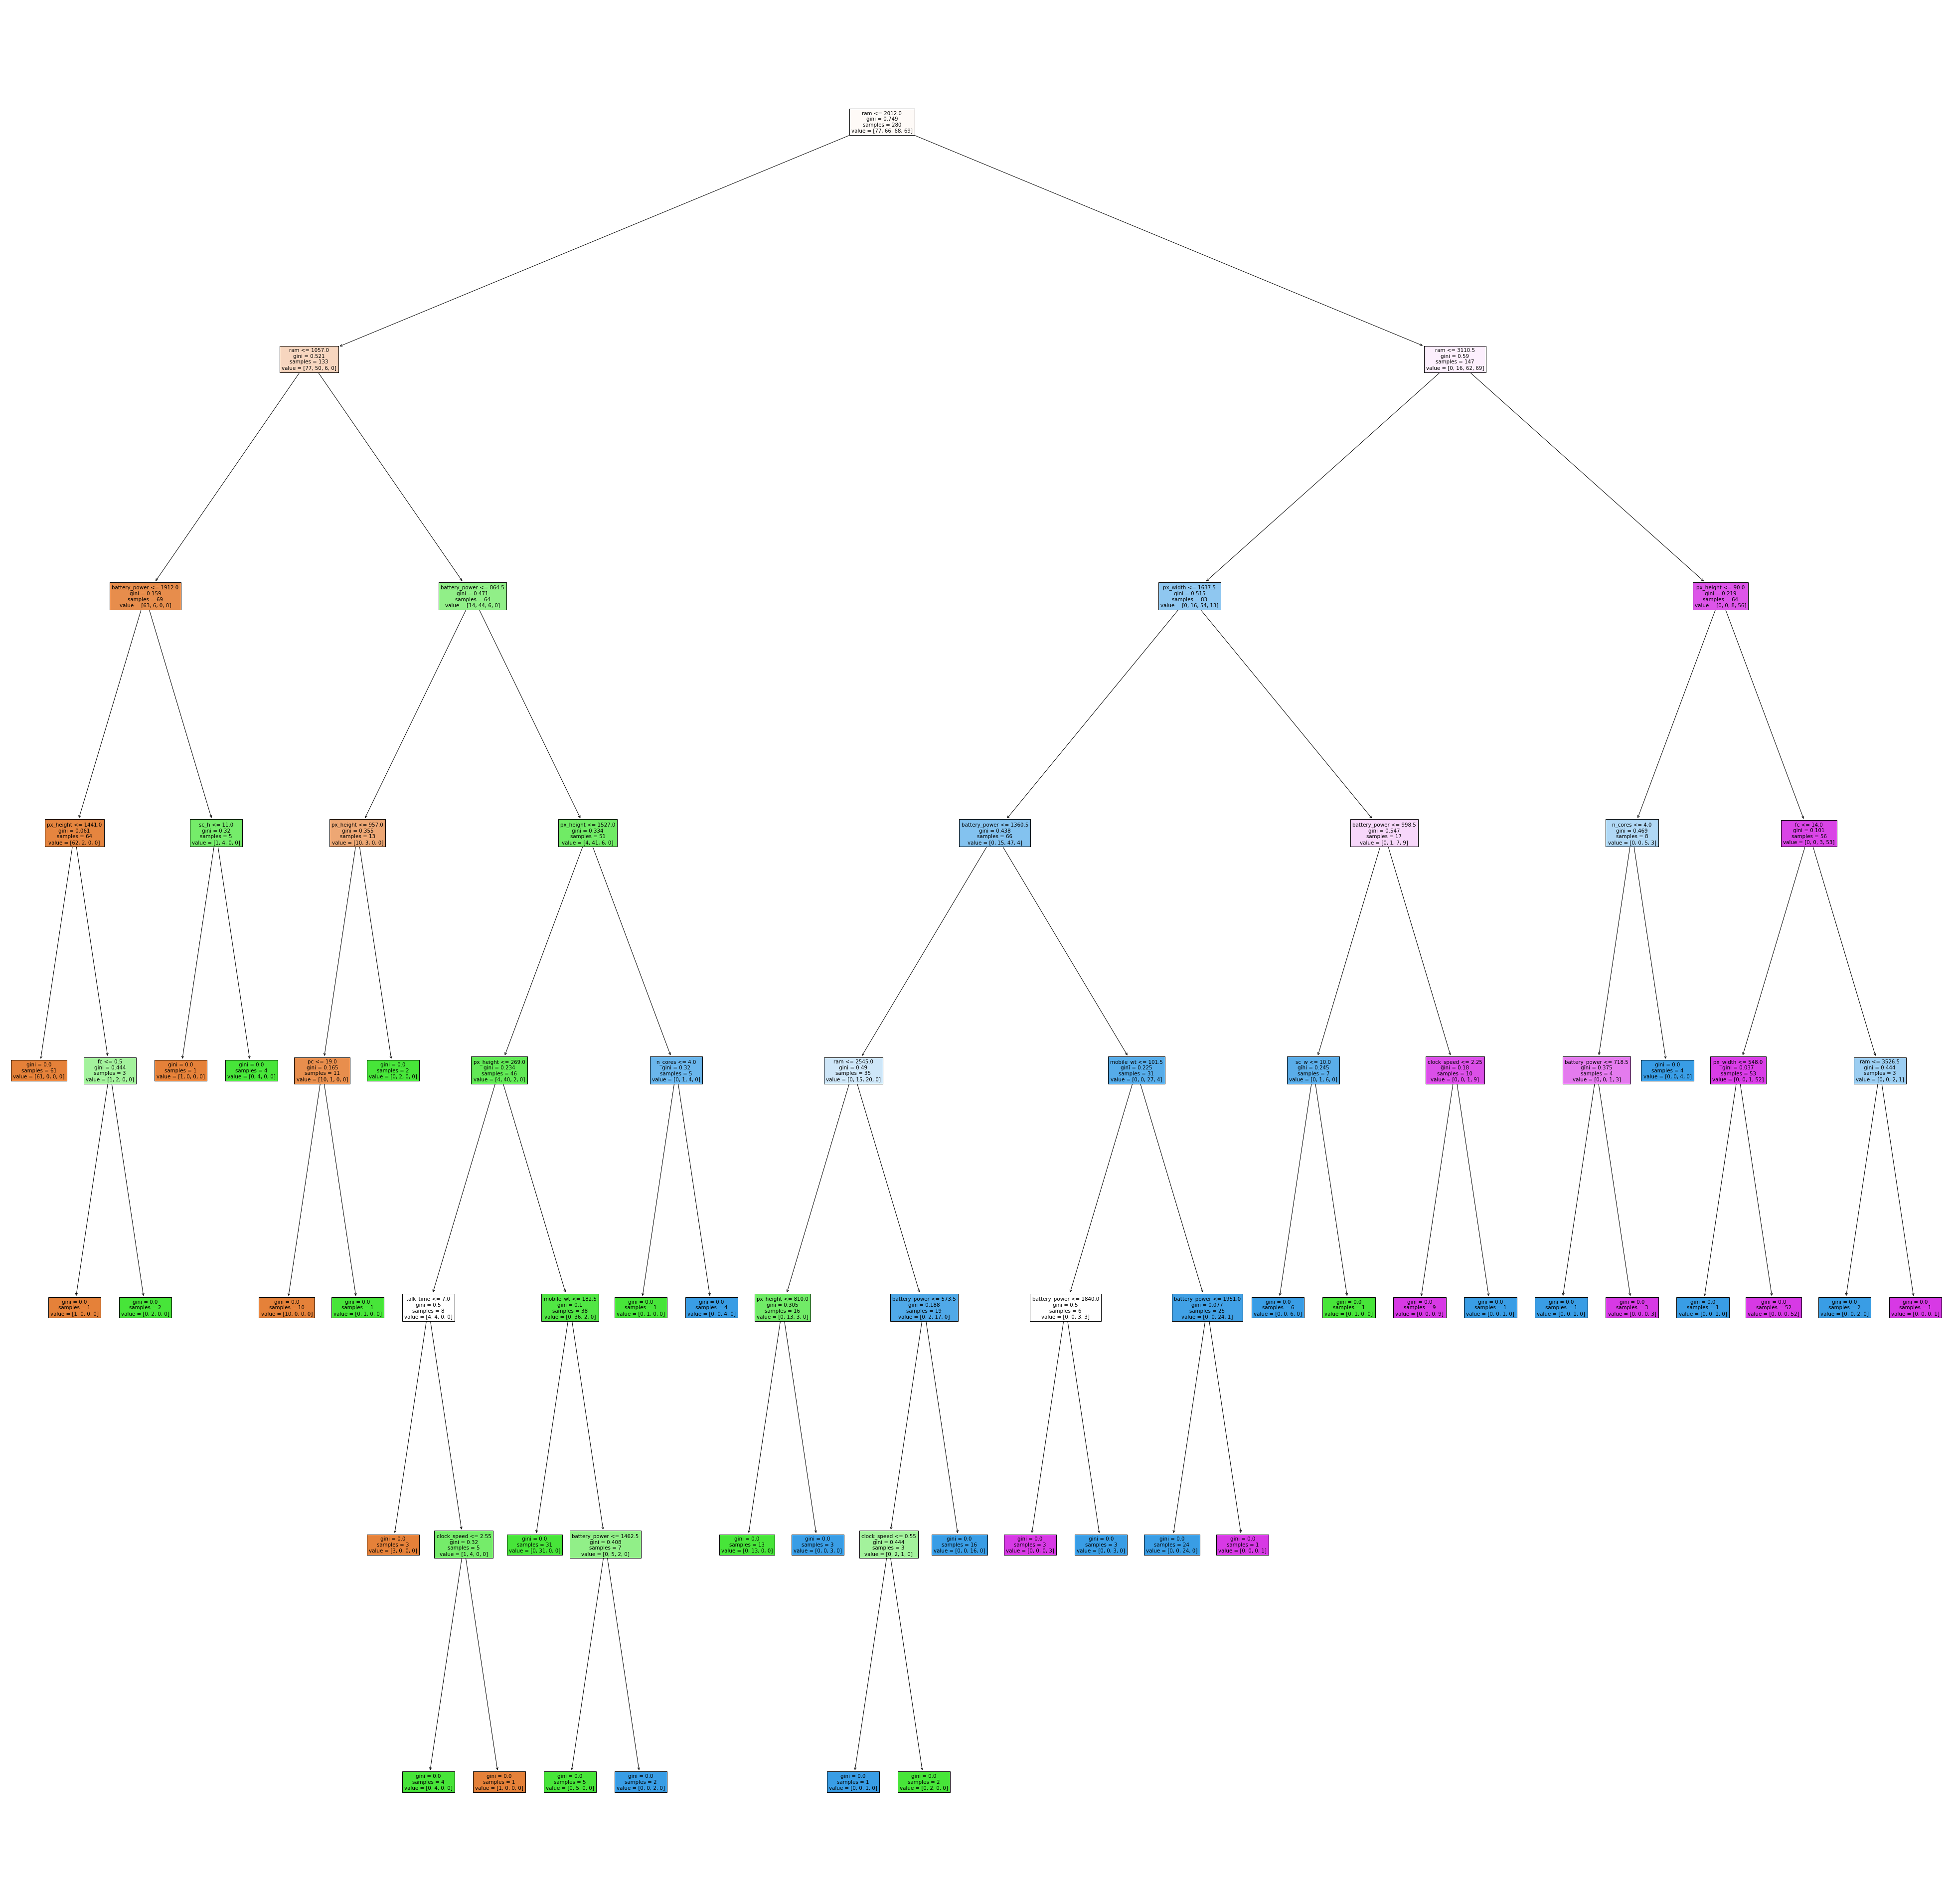

In [73]:
fig = plt.figure(figsize=(70,70))
_ = tree.plot_tree(dtree, 
                   feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],  
                   filled=True
                  )

## Wniosek: KNN ma większą dokładność niż Drzewo Decyzyjne

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
pred = knn.predict(X_test)

In [37]:
matrix = confusion_matrix(y_test, pred)
print(matrix)

[[31  0  0  0]
 [ 2 28  0  0]
 [ 0  3 23  2]
 [ 0  0  2 29]]


<AxesSubplot:>

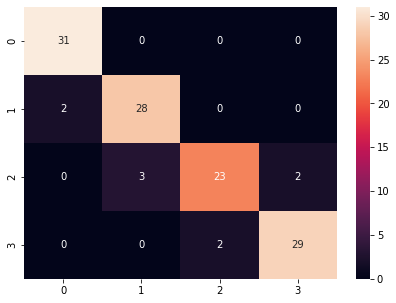

In [38]:
plt.figure(figsize = (7,5))
sns.heatmap(matrix,
            annot = True)